<a href="https://colab.research.google.com/github/gromdimon/code/blob/main/EDA_tumour_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Downloading data
data_path = 'https://github.com/gromdimon/Files/raw/main/BRCA.csv'
data = pd.read_csv(data_path)
data.tail(10)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
331,TCGA-A1-A0SG,61.0,FEMALE,-0.71947,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79.0,FEMALE,0.47940,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead
333,TCGA-B6-A40B,76.0,FEMALE,-0.24427,0.92556,-0.41823,-0.067848,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,05-Jan-21,Dead
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Show the missing values
data.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [6]:
# Droping last rows without any data
data_id = data[~data.Patient_ID.isnull()].copy()
data_id.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [7]:
data_id.shape

(334, 16)

In [10]:
# Finding missing values in Last_visit column
data_id.loc[data_id.Date_of_Last_Visit.isnull()]

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
7,TCGA-A7-A426,50.0,FEMALE,0.672490,1.27900,-0.321070,-0.112390,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,16-May-17,NaN,NaN
22,TCGA-AN-A0FY,55.0,FEMALE,0.330640,0.84757,-0.494660,0.116560,I,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,07-Nov-17,NaN,NaN
99,TCGA-A8-A06O,60.0,FEMALE,0.532420,1.54110,-1.009500,-0.125880,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,11-Dec-17,NaN,NaN
111,TCGA-MS-A51U,44.0,FEMALE,-0.278840,2.16880,-0.462330,0.272200,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,20-Jan-18,NaN,NaN
170,TCGA-AR-A0U2,47.0,FEMALE,0.515580,2.65020,-0.103130,-0.045725,III,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,29-Jul-18,NaN,Dead
182,TCGA-C8-A1HI,40.0,FEMALE,-1.455300,-0.74177,1.133600,-0.839700,III,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,07-Sep-18,NaN,NaN
189,TCGA-AO-A03O,69.0,FEMALE,-0.757790,-0.33780,0.561410,0.208300,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,07-Oct-18,NaN,Dead
196,TCGA-C8-A12U,46.0,FEMALE,-0.010999,0.86749,0.281570,-0.545880,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,10-Jun-19,NaN,NaN
206,TCGA-E9-A1NH,71.0,FEMALE,0.394090,1.70540,0.035642,1.441000,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,26-Nov-18,NaN,NaN
219,TCGA-C8-A12X,62.0,FEMALE,0.649340,1.81680,0.279260,0.132280,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,20-Jun-19,NaN,NaN


In [53]:
# Transforming data in Last_visit column
clear_visit = data_id.Date_of_Last_Visit.fillna('10-Jun-99')
clear_visit.isnull().sum()

0

In [54]:
# Making new dataframe
clear_visit.rename('last_visit', inplace=True)
clear_data = pd.concat([data_id, clear_visit], axis=1)
clear_data.drop(columns='Date_of_Last_Visit', inplace=True)
clear_data.shape

(334, 16)

In [55]:
# Proving imputation
clear_data.isnull().sum()

Patient_ID          0
Age                 0
Gender              0
Protein1            0
Protein2            0
Protein3            0
Protein4            0
Tumour_Stage        0
Histology           0
ER status           0
PR status           0
HER2 status         0
Surgery_type        0
Date_of_Surgery     0
Patient_Status     13
last_visit          0
dtype: int64

In [56]:
# Drop rows, that can not show Patient status
clear_data.dropna(axis=0, inplace=True)

In [59]:
# Changing format of time
clear_data['date_of_surgery'] = pd.to_datetime(clear_data['Date_of_Surgery'], format="%d-%b-%y")
clear_data['date_of_last_visit'] = pd.to_datetime(clear_data['last_visit'], format="%d-%b-%y", errors='ignore')
clear_data.drop(columns=['Date_of_Surgery', 'last_visit'], inplace=True)

In [61]:
# Changing Gender feature
def gender_changer(inf):
  if inf == 'FEMALE':
    return 0
  if inf == 'MALE':
    return 1
# 0 is Female, 1 is Male

In [65]:
# Applying this feature
clear_data['gender'] = clear_data['Gender'].apply(gender_changer)
clear_data.drop(columns='Gender', inplace=True)

In [69]:
# Evaluation of Patient Satus 
clear_data.Patient_Status.value_counts()

Alive    255
Dead      66
Name: Patient_Status, dtype: int64

In [74]:
# Transformation
def status_changer(inf):
  if inf == 'Alive':
    return 0
  if inf == 'Dead':
    return 1
# 0 is Alive, 1 is Dead

In [77]:
clear_data['patient_status'] = clear_data['Patient_Status'].apply(status_changer)
clear_data.drop(columns='Patient_Status', inplace=True)

In [78]:
# Doing the same with tumor stage
clear_data.Tumour_Stage.value_counts()

II     182
III     78
I       61
Name: Tumour_Stage, dtype: int64

In [83]:
def tumour_changer(inf):
  if inf == 'I':
    return 1
  if inf == 'II':
    return 2
  if inf == 'III':
    return 3

In [84]:
clear_data['tumour_stage'] = clear_data['Tumour_Stage'].apply(tumour_changer)
clear_data.drop(columns='Tumour_Stage', inplace=True)

In [87]:
# Handling ER PR Her2
print(clear_data.shape)
print(clear_data['ER status'].value_counts())
print(clear_data['HER2 status'].value_counts())
print(clear_data['PR status'].value_counts())

(321, 16)
Positive    321
Name: ER status, dtype: int64
Negative    292
Positive     29
Name: HER2 status, dtype: int64
Positive    321
Name: PR status, dtype: int64


In [90]:
# Concatinating 2 colomns in one
clear_data.rename(columns={'ER status': 'ER&PR_status'}, inplace=True)
clear_data.drop(columns='PR status', inplace=True)

In [91]:
# Show results of final dataframe after EDA
clear_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Patient_ID          321 non-null    object        
 1   Age                 321 non-null    float64       
 2   Protein1            321 non-null    float64       
 3   Protein2            321 non-null    float64       
 4   Protein3            321 non-null    float64       
 5   Protein4            321 non-null    float64       
 6   Histology           321 non-null    object        
 7   ER&PR_status        321 non-null    object        
 8   HER2 status         321 non-null    object        
 9   Surgery_type        321 non-null    object        
 10  date_of_surgery     321 non-null    datetime64[ns]
 11  date_of_last_visit  321 non-null    datetime64[ns]
 12  gender              321 non-null    int64         
 13  patient_status      321 non-null    int64         

In [103]:
# Downscale the data types to optimize memory allocation
clear_data['Age'] = clear_data['Age'].astype('int32')
clear_data['gender'] = clear_data['gender'].astype('int32')
clear_data['patient_status'] = clear_data['patient_status'].astype('int32')
clear_data['tumour_stage'] = clear_data['tumour_stage'].astype('int32')
clear_data['Protein1'] = clear_data['Protein1'].astype('float32')
clear_data['Protein2'] = clear_data['Protein2'].astype('float32')
clear_data['Protein3'] = clear_data['Protein3'].astype('float32')
clear_data['Protein4'] = clear_data['Protein4'].astype('float32')

In [105]:
# Final outlook on data
clear_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Patient_ID          321 non-null    object        
 1   Age                 321 non-null    int32         
 2   Protein1            321 non-null    float32       
 3   Protein2            321 non-null    float32       
 4   Protein3            321 non-null    float32       
 5   Protein4            321 non-null    float32       
 6   Histology           321 non-null    object        
 7   ER&PR_status        321 non-null    object        
 8   HER2 status         321 non-null    object        
 9   Surgery_type        321 non-null    object        
 10  date_of_surgery     321 non-null    datetime64[ns]
 11  date_of_last_visit  321 non-null    datetime64[ns]
 12  gender              321 non-null    int32         
 13  patient_status      321 non-null    int32         

In [107]:
clear_data

,Patient_ID,Age,Protein1,Protein2,Protein3,Protein4,Histology,ER&PR_status,HER2 status,Surgery_type,date_of_surgery,date_of_last_visit,gender,patient_status,tumour_stage
0,TCGA-D8-A1XD,36,0.080353,0.42638,0.54715,0.273680,Infiltrating Ductal Carcinoma,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,0,0,3
1,TCGA-EW-A1OX,43,-0.420320,0.57807,0.61447,-0.031505,Mucinous Carcinoma,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,0,1,2
2,TCGA-A8-A079,69,0.213980,1.31140,-0.32747,-0.234260,Infiltrating Ductal Carcinoma,Positive,Negative,Other,2017-09-08,2018-06-09,0,0,3
3,TCGA-D8-A1XR,56,0.345090,-0.21147,-0.19304,0.124270,Infiltrating Ductal Carcinoma,Positive,Negative,Modified Radical Mastectomy,2017-01-25,2017-07-12,0,0,2
4,TCGA-BH-A0BF,56,0.221550,1.90680,0.52045,-0.311990,Infiltrating Ductal Carcinoma,Positive,Negative,Other,2017-05-06,2019-06-27,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36,0.231800,0.61804,-0.55779,-0.517350,Infiltrating Ductal Carcinoma,Positive,Positive,Simple Mastectomy,2019-11-11,2020-02-09,0,1,3
330,TCGA-A8-A085,44,0.732720,1.11170,-0.26952,-0.354920,Infiltrating Lobular Carcinoma,Positive,Negative,Other,2019-11-01,2020-03-04,1,1,2
331,TCGA-A1-A0SG,61,-0.719470,2.54850,-0.15024,0.339680,Infiltrating Ductal Carcinoma,Positive,Negative,Lumpectomy,2019-11-11,2021-01-18,0,1,2
332,TCGA-A2-A0EU,79,0.479400,2.05590,-0.53136,-0.188480,Infiltrating Ductal Carcinoma,Positive,Positive,Lumpectomy,2019-11-21,2021-02-19,0,1,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


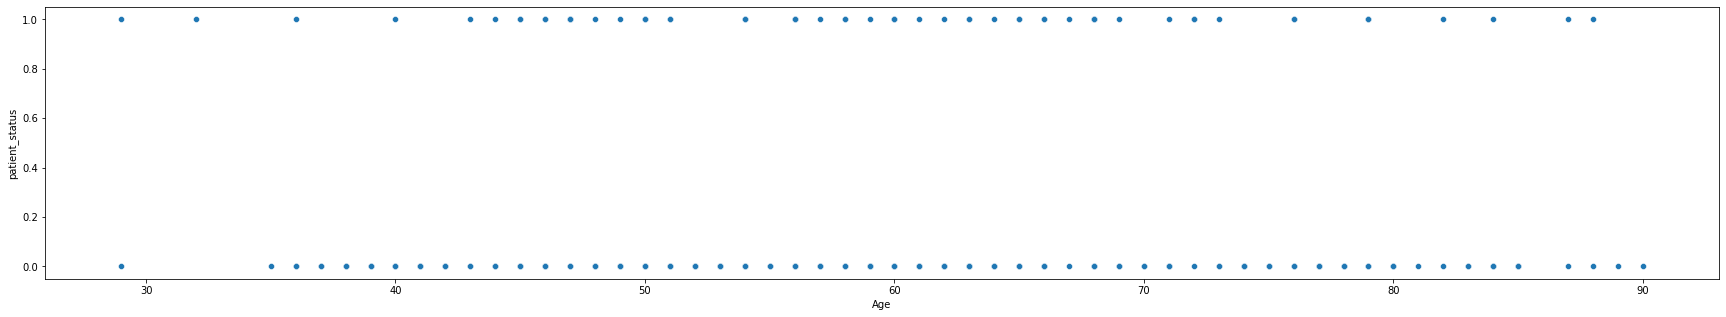

In [106]:
# Visualizing the data about age
plt.figure(figsize=(30,5))
sns.scatterplot(clear_data.Age, clear_data.patient_status)
# We see, that there is no correlation between age and death

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


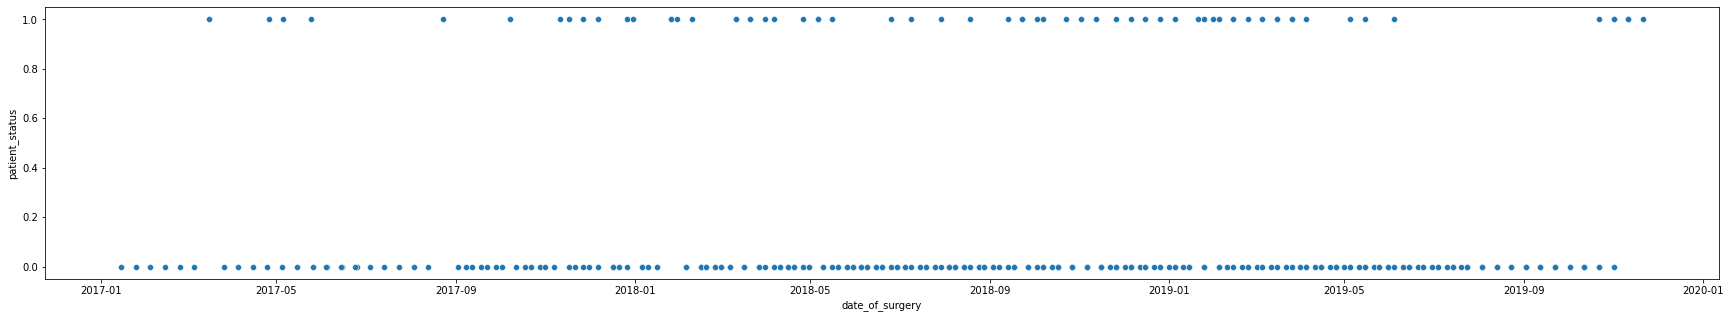

In [109]:
# Trying to visualize surgery 
plt.figure(figsize=(30,5))
sns.scatterplot(clear_data.date_of_surgery, clear_data.patient_status)
# We see, that surgery did not work as well in the period 2018.01 - 2019.05
# But there are another factors

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


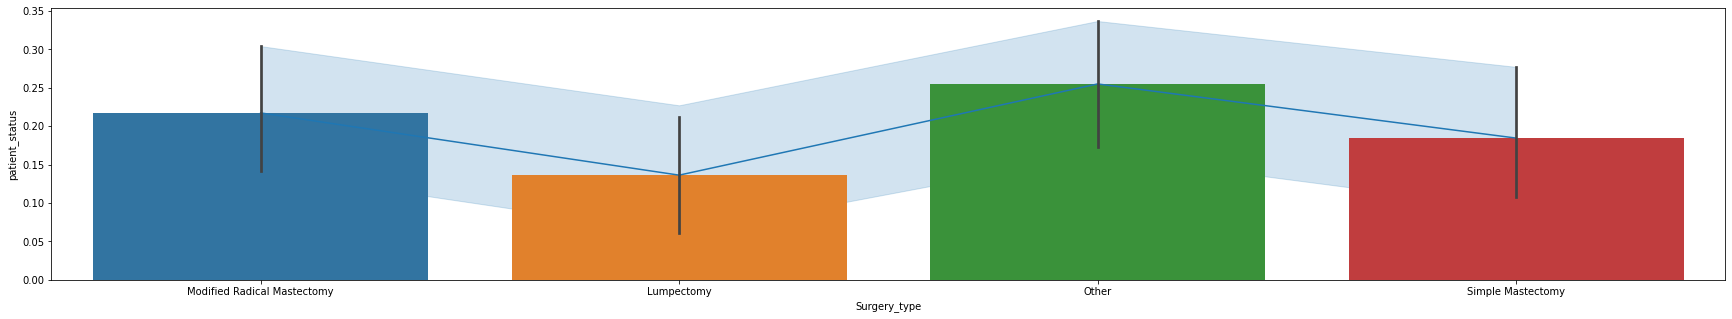

In [113]:
# Visualizing sugery_type
plt.figure(figsize=(30,5))
sns.lineplot(clear_data.Surgery_type, clear_data.patient_status)
sns.barplot(clear_data.Surgery_type, clear_data.patient_status)
# Different surgeries have different effect